

# A simple Darcy-Flow dataset
An intro to the small Darcy-Flow example dataset we ship with the package.


## Import the library
We first import our `neuralop` library and required dependencies.



In [1]:
import matplotlib.pyplot as plt
from neuralop.data.datasets import load_darcy_flow_small
from neuralop.layers.embeddings import GridEmbedding2D

## Load the dataset
Training samples are 16x16 and we load testing samples at both 
16x16 and 32x32 (to test resolution invariance).



In [2]:
train_loader, test_loaders, data_processor = load_darcy_flow_small(
        n_train=100, batch_size=4, 
        test_resolutions=[16, 32], n_tests=[50, 50], test_batch_sizes=[4, 2],
        )

train_dataset = train_loader.dataset

Loading test db for resolution 16 with 50 samples 
Loading test db for resolution 32 with 50 samples 


## Visualizing the data



16
Testing samples for res 16 have shape torch.Size([1, 16, 16])
32
Testing samples for res 32 have shape torch.Size([1, 32, 32])
Training samples have shape torch.Size([16, 16])


c:\Users\alfre\OneDrive\Documentos\Universidad\9NO SEMESTRE\EDPN\Proyecto_FNO\fno_venv\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\alfre\AppData\Local\Temp\ipykernel_26620\2688208138.py:47: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


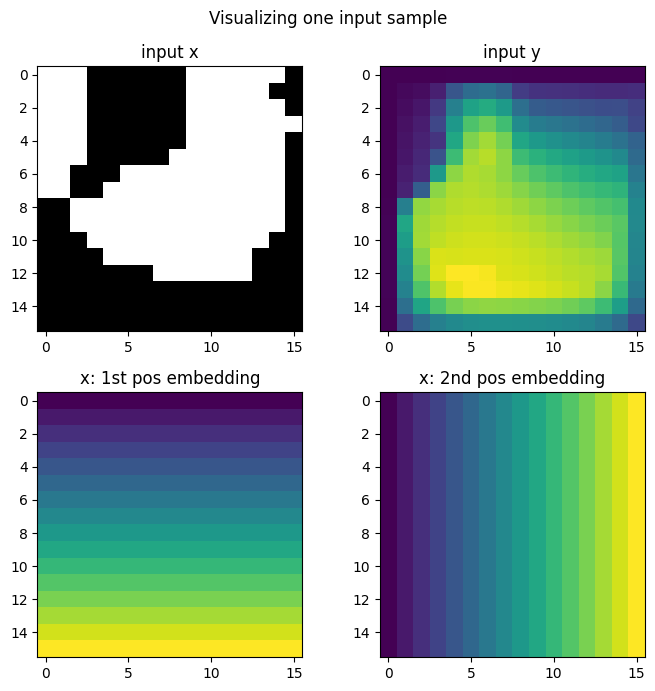

In [3]:
for res, test_loader in test_loaders.items():
    print(res)
    # Get first batch
    batch = next(iter(test_loader))
    x = batch['x']
    y = batch['y']

    print(f'Testing samples for res {res} have shape {x.shape[1:]}')


data = train_dataset[0]
x = data['x']
y = data['y']

print(f'Training samples have shape {x.shape[1:]}')


# Which sample to view
index = 0

data = train_dataset[index]
data = data_processor.preprocess(data, batched=False)

# The first step of the default FNO model is a grid-based
# positional embedding. We will add it manually here to
# visualize the channels appended by this embedding.
positional_embedding = GridEmbedding2D(in_channels=1)
# at train time, data will be collated with a batch dim.
# we create a batch dim to pass into the embedding, then re-squeeze
x = positional_embedding(data['x'].unsqueeze(0)).squeeze(0)
y = data['y']
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(2, 2, 1)
ax.imshow(x[0], cmap='gray')
ax.set_title('input x')
ax = fig.add_subplot(2, 2, 2)
ax.imshow(y.squeeze())
ax.set_title('input y')
ax = fig.add_subplot(2, 2, 3)
ax.imshow(x[1])
ax.set_title('x: 1st pos embedding')
ax = fig.add_subplot(2, 2, 4)
ax.imshow(x[2])
ax.set_title('x: 2nd pos embedding')
fig.suptitle('Visualizing one input sample', y=0.98)
plt.tight_layout()
fig.show()